In [14]:
from recons import antenna_set, coincidence_set, PWF_loss
import numpy as np

In [30]:
an =  antenna_set('../Chiche/67.8/coord_antennas.txt')
co =  coincidence_set('../Chiche/67.8/Rec_coinctable.txt',an)

 Reading antenna positions from file ../Chiche/67.8/coord_antennas.txt
 Reading coincidence(s): index, peak time, peak amplitude from file ../Chiche/67.8/Rec_coinctable.txt


In [10]:
current_recons=0
args=(co.antenna_coords_array[current_recons,:],co.peak_time_array[current_recons,:])

In [15]:
angles = np.deg2rad(np.array([112.2, 270.]))
PWF_loss(angles,*args)

441263.63584758097

In [16]:
from scipy.optimize import minimize
res = minimize(PWF_loss,angles, args=args, method='BFGS')

In [20]:
np.rad2deg(res.x)
PWF_loss(res.x,*args)

430184.29066323396

In [25]:
from simulation import Simulations
s = Simulations('../Chiche/67.8/coord_antennas.txt')
s(angles,sigma_t=5e-9)

 Reading antenna positions from file ../Chiche/67.8/coord_antennas.txt


In [26]:
co2 = coincidence_set('Rec_coinctable_simulated.txt',an)
args2 = (co2.antenna_coords_array[current_recons,:],co2.peak_time_array[current_recons,:])
PWF_loss(angles,*args2)

 Reading coincidence(s): index, peak time, peak amplitude from file Rec_coinctable_simulated.txt


22512.87460602871

### MCMC on theta, phi

In [51]:
def logprob(angles,*args):
    return -0.5*PWF_loss(angles,*args)

In [62]:
current_recons=0
args=(co.antenna_coords_array[current_recons,:],co.peak_time_array[current_recons,:])
ndim,nwalkers = 2,10
from emcee import EnsembleSampler
sampler = EnsembleSampler(nwalkers,ndim,logprob,args=args)
thetas = np.random.rand(10)*np.pi/2 + np.pi/2
phis = np.random.rand(10)*2.*np.pi
p0 = np.vstack((thetas,phis)).T


In [64]:
state = sampler.run_mcmc(p0, 100)
sampler.reset()
sampler.run_mcmc(state,10000)

State([[ 4.32058879 -4.71952591]
 [ 1.18423887  4.71603065]
 [ 1.95740414  4.71539874]
 [ 1.95736163 -1.5678545 ]
 [ 1.95737252  4.71535849]
 [ 1.95736705 -1.56785604]
 [ 1.95735049  4.71542782]
 [-1.19799364  7.84415926]
 [ 4.3232468   1.57078049]
 [ 1.18434662 -1.56721568]], log_prob=[-290729.50802855 -215308.76898523 -215092.31984228 -215096.05459271
 -215093.72937123 -215095.98477495 -215093.43821371 -435439.21509125
 -224550.71533717 -215280.2958783 ], blobs=None, random_state=('MT19937', array([ 903976639, 3918408344,  159129790,  259329073, 1355903392,
       2149020885,  945605628,  161282373, 3592830224, 3687161473,
       3373087030, 1637063499, 1124341947,  403883351, 2979718282,
        311497874, 3099779329, 2685080607, 2250760898, 2593454583,
        797011580, 1592130219, 3280515369, 3186484188, 2812819661,
        390865857,    5459004, 3136259286, 2335628455, 3658058324,
       1580227552, 2905762894, 2741981344, 1864065397,  813552152,
       3089306451, 4059161109, 3

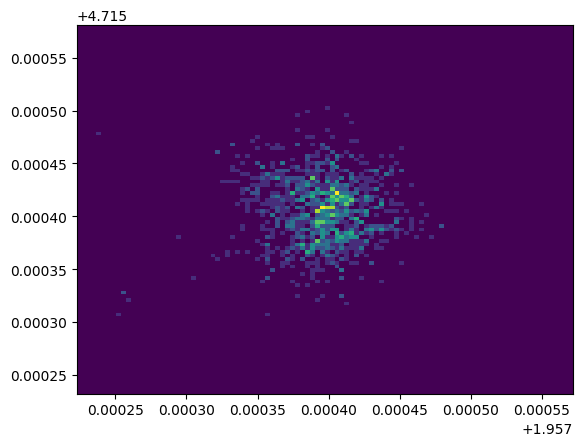

Peak value in degrees: theta = 112.150599, phi = 270.172903


In [81]:
samples = sampler.get_chain(flat=True,thin=25)
logprobs = sampler.get_log_prob(flat=True,thin=25)
%matplotlib inline
from matplotlib import pyplot as plt
mask = (samples[:,0]>np.pi/2)*(samples[:,0]<np.pi)*(samples[:,1]>0)*(samples[:,1]<2.*np.pi)
med = np.median(samples[mask,:],axis=0)
onedeg = np.deg2rad(0.01)
plt.hist2d(samples[mask,0],samples[mask,1],bins=100,range=[[med[0]-onedeg,med[0]+onedeg],[med[1]-onedeg,med[1]+onedeg]])
plt.show()
print('Peak value in degrees: theta = %f, phi = %f'%tuple(np.rad2deg(med)))

In [83]:
samples[mask,:].shape

(1200, 2)

In [72]:
np.median?

Signature: np.median(a, axis=None, out=None, overwrite_input=False, keepdims=False)
Docstring:
Compute the median along the specified axis.

Returns the median of the array elements.

Parameters
----------
a : array_like
    Input array or object that can be converted to an array.
axis : {int, sequence of int, None}, optional
    Axis or axes along which the medians are computed. The default
    is to compute the median along a flattened version of the array.
    A sequence of axes is supported since version 1.9.0.
out : ndarray, optional
    Alternative output array in which to place the result. It must
    have the same shape and buffer length as the expected output,
    but the type (of the output) will be cast if necessary.
overwrite_input : bool, optional
   If True, then allow use of memory of input array `a` for
   calculations. The input array will be modified by the call to
   `median`. This will save memory when you do not need to preserve
   the contents of the input array. 